## Content

<ul>
    <li> Dataframes </li>
    <li> Visual </li>
</ul>

## Indroduction

This is the laub loomis model we are going to go through. We exploring the simulations of the laub loomis solved by the euler method. Then go through the predictions given. by the neural network

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
from scipy.integrate import odeint
import sys
sys.path.insert(1, '../../')
import prototype_nn as NN
import pandas as pd
import numpy as np

In [2]:
mu = 0.5

def laub(state, t):
    x, y, z, w, p, q, m = state
    func_1 = 1.4 * z - 0.9 * x
    func_2 = 2.5 * p - 1.5 * y
    func_3 = 0.6 * m - 0.8 * y * z
    func_4 = 2 - 1.3 * z * w
    func_5 = 0.7 * x - w * p
    func_6 = 0.3 * x - 3.1 * q
    func_7 = 1.8 * q - 1.5 * y * m
    return func_1, func_2, func_3, func_4, func_5, func_6, func_7


def states(x, y, z, w, p, q, m, t):
    """
        states:
            This will be used to implement the model -laub using the odeint
            method. It then returns the states belonging to the system
        Args:
            x (int): This is the x value
            y (int): This is the y value
            z (int): This is the z value
            w (int): This is the w value
            p (int): This is the p value
            q (int): This is the q value
        Returns
            (<class 'numpy.ndarray'>) : This is the data of the model.
    """
    state_0 = [x, y, z, w, p, q, m]
    states = odeint(laub, state_0, t)
    return states
    
def dataframe(x, y, z, w, p, q, m, t, init_x, init_y, init_z, init_w, init_p, init_q, init_m):
    """
        dataframe:
            This will produce the dataframe of the van der pol model
            showing the x, y state values including the time variable,
            initial x and y state values
        Args:
            x (int):
                The x value state to start from
            y (int): 
                The y value state to start from
            z (int):
                The z value state to start from
            w (int): 
                The w value state to start from
            p (int):
                The p value state to start from
            q (int): 
                The q value state to start from
            m (int): 
                The m value state to start from
            init_x (int) :
                The initial x state value
            init_y (int):
                The initial y state value
            init_z (int) :
                The initial z state value
            init_w (int):
                The initial w state value
            init_p (int):
                The initial p state value
            init_q (int):
                The initial q state value
            init_m (int):
                The initial m state value
        Return:
            (<class 'pandas.core.frame.DataFrame'>): The dataframe of the model
    """
    state = states(x, y, z, w, p, q, m, t)
    data = {'time' : t, 'x' : state[:, 0], 'y' : state[:, 1], 'z' : state[:, 2],
                'w' : state[:, 3], 'p' : state[:, 4], 'q' : state[:, 5], 'm' : state[:, 6]}
    df = pd.DataFrame(data=data)
    df['initial_x'] = init_x
    df['initial_y'] = init_y
    df['initial_z'] = init_z
    df['initial_w'] = init_w
    df['initial_p'] = init_q
    df['initial_q'] = init_p
    df['initial_m'] = init_m
    return df

## Dataframes

This is the data showing the simulations of the laub loomis system. 

In [3]:
t = np.arange(0,20.1,0.1)
ranges = range(3,5,1)
laub_df_test = []
for x, y, z, w, p, q, m in product(ranges, ranges, ranges, ranges, ranges, ranges, ranges):
        df = dataframe(x, y, z, w, p, q, m, t, x, y, z, w, p, q, m) # test for 3, 5
        laub_df_test.append(df)

In [4]:
len(laub_df_test)

128

In [5]:
laub_df_test[0]

time         x         y         z         w         p         q  \
0     0.0  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000   
1     0.1  3.107348  3.213028  2.475219  2.271830  2.503192  2.279362   
2     0.2  3.138731  3.312080  2.007332  1.873324  2.237388  1.752518   
3     0.3  3.109656  3.349853  1.612081  1.660840  2.078357  1.366063   
4     0.4  3.035074  3.352171  1.288087  1.559490  1.969560  1.081221   
..    ...       ...       ...       ...       ...       ...       ...   
196  19.6  0.866270  0.327754  0.588248  2.797644  0.209066  0.082403   
197  19.7  0.870604  0.330891  0.590216  2.783869  0.211213  0.082843   
198  19.8  0.874817  0.334089  0.592010  2.770456  0.213350  0.083276   
199  19.9  0.878896  0.337336  0.593626  2.757446  0.215470  0.083701   
200  20.0  0.882827  0.340619  0.595062  2.744876  0.217564  0.084115   

            m  initial_x  initial_y  initial_z  initial_w  initial_p  \
0    3.000000          3          3          3          3          3   
1    2.250696          3          3          3          3          3   
2    1.659786          3          3          3          3          3   
3    1.223587          3          3          3          3          3   
4    0.910322          3          3          3          3          3   
..        ...        ...        ...        ...        ...        ...   
196  0.291280          3          3          3          3          3   
197  0.291751          3          3          3          3          3   
198  0.292142          3          3          3          3          3   
199  0.292450          3          3          3          3          3   
200  0.292678          3          3          3          3          3   

     initial_q  initial_m  
0            3          3  
1            3          3  
2            3          3  
3            3          3  
4            3          3  
..         ...        ...  
196          3          3  
197          3          3  
198          3          3  
199          3          3  
200          3          3  

[201 rows x 15 columns]

In [6]:
laub_df_test[1]

time         x         y         z         w         p         q  \
0     0.0  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000   
1     0.1  3.110575  3.213076  2.517265  2.265016  2.503904  2.279394   
2     0.2  3.148622  3.312587  2.065538  1.856290  2.240961  1.752712   
3     0.3  3.126730  3.351637  1.672234  1.635285  2.086498  1.366558   
4     0.4  3.058444  3.356245  1.343282  1.527465  1.983263  1.082113   
..    ...       ...       ...       ...       ...       ...       ...   
196  19.6  0.863509  0.325781  0.586975  2.806468  0.207710  0.082124   
197  19.7  0.867918  0.328879  0.589051  2.792469  0.209862  0.082568   
198  19.8  0.872213  0.332045  0.590956  2.778807  0.212009  0.083006   
199  19.9  0.876383  0.335266  0.592686  2.765523  0.214143  0.083437   
200  20.0  0.880412  0.338532  0.594237  2.752657  0.216257  0.083858   

            m  initial_x  initial_y  initial_z  initial_w  initial_p  \
0    4.000000          3          3          3          3          3   
1    2.877002          3          3          3          3          3   
2    2.043277          3          3          3          3          3   
3    1.455968          3          3          3          3          3   
4    1.050532          3          3          3          3          3   
..        ...        ...        ...        ...        ...        ...   
196  0.290968          3          3          3          3          3   
197  0.291491          3          3          3          3          3   
198  0.291932          3          3          3          3          3   
199  0.292292          3          3          3          3          3   
200  0.292571          3          3          3          3          3   

     initial_q  initial_m  
0            3          4  
1            3          4  
2            3          4  
3            3          4  
4            3          4  
..         ...        ...  
196          3          4  
197          3          4  
198          3          4  
199          3          4  
200          3          4  

[201 rows x 15 columns]

In [7]:
laub_df_test[2]

time         x         y         z         w         p         q  \
0     0.0  3.000000  3.000000  3.000000  3.000000  3.000000  4.000000   
1     0.1  3.107539  3.213030  2.479051  2.271427  2.503223  3.012810   
2     0.2  3.139884  3.312114  2.018093  1.871331  2.237691  2.290480   
3     0.3  3.112589  3.350028  1.629026  1.656404  2.079369  1.760682   
4     0.4  3.040330  3.352691  1.309186  1.552161  1.971787  1.370759   
..    ...       ...       ...       ...       ...       ...       ...   
196  19.6  0.866479  0.328036  0.588236  2.796821  0.209206  0.082430   
197  19.7  0.870792  0.331165  0.590188  2.783113  0.211346  0.082868   
198  19.8  0.874984  0.334355  0.591967  2.769769  0.213475  0.083299   
199  19.9  0.879042  0.337593  0.593569  2.756827  0.215586  0.083721   
200  20.0  0.882952  0.340866  0.594992  2.744325  0.217672  0.084134   

            m  initial_x  initial_y  initial_z  initial_w  initial_p  \
0    3.000000          3          3          3          3          4   
1    2.372499          3          3          3          3          4   
2    1.822865          3          3          3          3          4   
3    1.387110          3          3          3          3          4   
4    1.056546          3          3          3          3          4   
..        ...        ...        ...        ...        ...        ...   
196  0.291240          3          3          3          3          4   
197  0.291706          3          3          3          3          4   
198  0.292092          3          3          3          3          4   
199  0.292395          3          3          3          3          4   
200  0.292618          3          3          3          3          4   

     initial_q  initial_m  
0            3          3  
1            3          3  
2            3          3  
3            3          3  
4            3          3  
..         ...        ...  
196          3          3  
197          3          3  
198          3          3  
199          3          3  
200          3          3  

[201 rows x 15 columns]

In [8]:
laub_df = pd.concat(laub_df_test)
laub_df

time         x         y         z         w         p         q  \
0     0.0  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000   
1     0.1  3.107348  3.213028  2.475219  2.271830  2.503192  2.279362   
2     0.2  3.138731  3.312080  2.007332  1.873324  2.237388  1.752518   
3     0.3  3.109656  3.349853  1.612081  1.660840  2.078357  1.366063   
4     0.4  3.035074  3.352171  1.288087  1.559490  1.969560  1.081221   
..    ...       ...       ...       ...       ...       ...       ...   
196  19.6  0.866917  0.326544  0.589920  2.797602  0.208907  0.082406   
197  19.7  0.871424  0.329824  0.591949  2.783235  0.211144  0.082865   
198  19.8  0.875802  0.333165  0.593796  2.769257  0.213371  0.083315   
199  19.9  0.880038  0.336556  0.595458  2.755711  0.215578  0.083757   
200  20.0  0.884119  0.339984  0.596930  2.742633  0.217759  0.084188   

            m  initial_x  initial_y  initial_z  initial_w  initial_p  \
0    3.000000          3          3          3          3          3   
1    2.250696          3          3          3          3          3   
2    1.659786          3          3          3          3          3   
3    1.223587          3          3          3          3          3   
4    0.910322          3          3          3          3          3   
..        ...        ...        ...        ...        ...        ...   
196  0.292147          4          4          4          4          4   
197  0.292628          4          4          4          4          4   
198  0.293024          4          4          4          4          4   
199  0.293334          4          4          4          4          4   
200  0.293559          4          4          4          4          4   

     initial_q  initial_m  
0            3          3  
1            3          3  
2            3          3  
3            3          3  
4            3          3  
..         ...        ...  
196          4          4  
197          4          4  
198          4          4  
199          4          4  
200          4          4  

[25728 rows x 15 columns]

This is makes a new columns and wraps the initials variables into a tuple

In [9]:
laub_df['init_x,init_y,init_z,init_w,init_p,init_q,init_m'] = list(zip(laub_df.initial_x, 
                                                                      laub_df.initial_y,
                                                                      laub_df.initial_z,
                                                                      laub_df.initial_w,
                                                                      laub_df.initial_p,
                                                                      laub_df.initial_q,
                                                                      laub_df.initial_m))
laub_df

time         x         y         z         w         p         q  \
0     0.0  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000   
1     0.1  3.107348  3.213028  2.475219  2.271830  2.503192  2.279362   
2     0.2  3.138731  3.312080  2.007332  1.873324  2.237388  1.752518   
3     0.3  3.109656  3.349853  1.612081  1.660840  2.078357  1.366063   
4     0.4  3.035074  3.352171  1.288087  1.559490  1.969560  1.081221   
..    ...       ...       ...       ...       ...       ...       ...   
196  19.6  0.866917  0.326544  0.589920  2.797602  0.208907  0.082406   
197  19.7  0.871424  0.329824  0.591949  2.783235  0.211144  0.082865   
198  19.8  0.875802  0.333165  0.593796  2.769257  0.213371  0.083315   
199  19.9  0.880038  0.336556  0.595458  2.755711  0.215578  0.083757   
200  20.0  0.884119  0.339984  0.596930  2.742633  0.217759  0.084188   

            m  initial_x  initial_y  initial_z  initial_w  initial_p  \
0    3.000000          3          3          3          3          3   
1    2.250696          3          3          3          3          3   
2    1.659786          3          3          3          3          3   
3    1.223587          3          3          3          3          3   
4    0.910322          3          3          3          3          3   
..        ...        ...        ...        ...        ...        ...   
196  0.292147          4          4          4          4          4   
197  0.292628          4          4          4          4          4   
198  0.293024          4          4          4          4          4   
199  0.293334          4          4          4          4          4   
200  0.293559          4          4          4          4          4   

     initial_q  initial_m init_x,init_y,init_z,init_w,init_p,init_q,init_m  
0            3          3                            (3, 3, 3, 3, 3, 3, 3)  
1            3          3                            (3, 3, 3, 3, 3, 3, 3)  
2            3          3                            (3, 3, 3, 3, 3, 3, 3)  
3            3          3                            (3, 3, 3, 3, 3, 3, 3)  
4            3          3                            (3, 3, 3, 3, 3, 3, 3)  
..         ...        ...                                              ...  
196          4          4                            (4, 4, 4, 4, 4, 4, 4)  
197          4          4                            (4, 4, 4, 4, 4, 4, 4)  
198          4          4                            (4, 4, 4, 4, 4, 4, 4)  
199          4          4                            (4, 4, 4, 4, 4, 4, 4)  
200          4          4                            (4, 4, 4, 4, 4, 4, 4)  

[25728 rows x 16 columns]

This is selections all of the initial variables which are equal to 1

In [10]:
laub_df_x1y1 = laub_df[laub_df['init_x,init_y,init_z,init_w,init_p,init_q,init_m'] == (3, 3, 3, 3, 3, 3, 3)]
laub_df_x1y1

time         x         y         z         w         p         q  \
0     0.0  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000   
1     0.1  3.107348  3.213028  2.475219  2.271830  2.503192  2.279362   
2     0.2  3.138731  3.312080  2.007332  1.873324  2.237388  1.752518   
3     0.3  3.109656  3.349853  1.612081  1.660840  2.078357  1.366063   
4     0.4  3.035074  3.352171  1.288087  1.559490  1.969560  1.081221   
..    ...       ...       ...       ...       ...       ...       ...   
196  19.6  0.866270  0.327754  0.588248  2.797644  0.209066  0.082403   
197  19.7  0.870604  0.330891  0.590216  2.783869  0.211213  0.082843   
198  19.8  0.874817  0.334089  0.592010  2.770456  0.213350  0.083276   
199  19.9  0.878896  0.337336  0.593626  2.757446  0.215470  0.083701   
200  20.0  0.882827  0.340619  0.595062  2.744876  0.217564  0.084115   

            m  initial_x  initial_y  initial_z  initial_w  initial_p  \
0    3.000000          3          3          3          3          3   
1    2.250696          3          3          3          3          3   
2    1.659786          3          3          3          3          3   
3    1.223587          3          3          3          3          3   
4    0.910322          3          3          3          3          3   
..        ...        ...        ...        ...        ...        ...   
196  0.291280          3          3          3          3          3   
197  0.291751          3          3          3          3          3   
198  0.292142          3          3          3          3          3   
199  0.292450          3          3          3          3          3   
200  0.292678          3          3          3          3          3   

     initial_q  initial_m init_x,init_y,init_z,init_w,init_p,init_q,init_m  
0            3          3                            (3, 3, 3, 3, 3, 3, 3)  
1            3          3                            (3, 3, 3, 3, 3, 3, 3)  
2            3          3                            (3, 3, 3, 3, 3, 3, 3)  
3            3          3                            (3, 3, 3, 3, 3, 3, 3)  
4            3          3                            (3, 3, 3, 3, 3, 3, 3)  
..         ...        ...                                              ...  
196          3          3                            (3, 3, 3, 3, 3, 3, 3)  
197          3          3                            (3, 3, 3, 3, 3, 3, 3)  
198          3          3                            (3, 3, 3, 3, 3, 3, 3)  
199          3          3                            (3, 3, 3, 3, 3, 3, 3)  
200          3          3                            (3, 3, 3, 3, 3, 3, 3)  

[201 rows x 16 columns]

This datafame is looking at future predictions

In [11]:
laub_df_test_1 = []
t = np.arange(499.8,600,0.1)
ranges = range(1,3,1)
for x, y, z, w, p, q, m in product(ranges, ranges, ranges, ranges, ranges, ranges, ranges):
    df = pd.DataFrame(pd.read_csv("../../data/train/laub.csv"))
    row = df[(df.initial_x == x) & (df.initial_y == y ) 
             & (df.initial_z == z ) & (df.initial_w == w) & (df.initial_p == p ) 
             & (df.initial_q == q ) & (df.initial_m == m )
             & (df.time == 499.9)]
    df_1 = dataframe(row.x.item(),row.y.item(), 
                     row.z.item(),row.w.item(), 
                     row.p.item(),row.q.item(),
                     row.m.item(),t,
                     x, y, z, w, p, q, m)
    laub_df_test_1.append(df_1)

In [12]:
len(laub_df_test_1)

128

In [13]:
laub_df_test_1[0]

time        x         y         z        w         p        q  \
0     499.8  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
1     499.9  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
2     500.0  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
3     500.1  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
4     500.2  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
...     ...      ...       ...       ...      ...       ...      ...   
997   599.5  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
998   599.6  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
999   599.7  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
1000  599.8  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
1001  599.9  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   

             m  initial_x  initial_y  initial_z  initial_w  initial_p  \
0     0.274146          1          1          1          1          1   
1     0.274146          1          1          1          1          1   
2     0.274146          1          1          1          1          1   
3     0.274146          1          1          1          1          1   
4     0.274146          1          1          1          1          1   
...        ...        ...        ...        ...        ...        ...   
997   0.274146          1          1          1          1          1   
998   0.274146          1          1          1          1          1   
999   0.274146          1          1          1          1          1   
1000  0.274146          1          1          1          1          1   
1001  0.274146          1          1          1          1          1   

      initial_q  initial_m  
0             1          1  
1             1          1  
2             1          1  
3             1          1  
4             1          1  
...         ...        ...  
997           1          1  
998           1          1  
999           1          1  
1000          1          1  
1001          1          1  

[1002 rows x 15 columns]

In [14]:
laub_df_test_1[1]

time        x         y         z        w         p        q  \
0     499.8  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
1     499.9  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
2     500.0  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
3     500.1  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
4     500.2  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
...     ...      ...       ...       ...      ...       ...      ...   
997   599.5  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
998   599.6  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
999   599.7  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
1000  599.8  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
1001  599.9  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   

             m  initial_x  initial_y  initial_z  initial_w  initial_p  \
0     0.274146          1          1          1          1          1   
1     0.274146          1          1          1          1          1   
2     0.274146          1          1          1          1          1   
3     0.274146          1          1          1          1          1   
4     0.274146          1          1          1          1          1   
...        ...        ...        ...        ...        ...        ...   
997   0.274146          1          1          1          1          1   
998   0.274146          1          1          1          1          1   
999   0.274146          1          1          1          1          1   
1000  0.274146          1          1          1          1          1   
1001  0.274146          1          1          1          1          1   

      initial_q  initial_m  
0             1          2  
1             1          2  
2             1          2  
3             1          2  
4             1          2  
...         ...        ...  
997           1          2  
998           1          2  
999           1          2  
1000          1          2  
1001          1          2  

[1002 rows x 15 columns]

In [15]:
laub_df_1 = pd.concat(laub_df_test_1)

This reads the predictions made by the neural network of the simulations of laub loomis

In [16]:
def preds(num_inputs, num_classes, learning_rate, inputs):
    model = NN.prototype(num_inputs, num_classes, learning_rate)
    model.load_state_dict(NN.torch.load("../../data/state/loomis.pth"))
    preds = model(inputs).detach()
    
    preds_x = preds[:,0].numpy().flatten()
    preds_y = preds[:,1].numpy().flatten()
    preds_z = preds[:,2].numpy().flatten()
    preds_w = preds[:,3].numpy().flatten()
    preds_p = preds[:,4].numpy().flatten()
    preds_q = preds[:,5].numpy().flatten()
    preds_m = preds[:,6].numpy().flatten()
    
    return preds_x, preds_y, preds_z, preds_w, preds_p, preds_q, preds_m

In [19]:
def dataframe_predictions(test_df):
    preds_test_df = []
    for i in range(0, len(test_df)):
        inputs = NN.torch.from_numpy(test_df[i][['time','initial_x',
                                                 'initial_y',
                                                 'initial_z',
                                                 'initial_w',
                                                 'initial_p',
                                                 'initial_q',
                                                 'initial_m']].to_numpy(dtype='float32') )
        preds_x, preds_y, preds_z, preds_w, preds_p, preds_q, preds_m = preds(8, 7, 0.1, inputs)
        df = test_df[i]
        df["x_preds"] = preds_x
        df["y_preds"] = preds_y
        df["z_preds"] = preds_z
        df["w_preds"] = preds_w
        df["p_preds"] = preds_p
        df["q_preds"] = preds_q
        df["m_preds"] = preds_m
        preds_test_df.append(df)
    return preds_test_df

This is the test data containing different initial times from the training data

In [20]:
laub_df_test_preds = dataframe_predictions(laub_df_test)
len(laub_df_test_preds)

128

This is the test data containing future times that does not exists in the training data

In [21]:
laub_df_test_preds_1 = dataframe_predictions(laub_df_test_1)
len(laub_df_test_preds_1)

128

In [22]:
laub_df_test_preds[0]

time         x         y         z         w         p         q  \
0     0.0  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000   
1     0.1  3.107348  3.213028  2.475219  2.271830  2.503192  2.279362   
2     0.2  3.138731  3.312080  2.007332  1.873324  2.237388  1.752518   
3     0.3  3.109656  3.349853  1.612081  1.660840  2.078357  1.366063   
4     0.4  3.035074  3.352171  1.288087  1.559490  1.969560  1.081221   
..    ...       ...       ...       ...       ...       ...       ...   
196  19.6  0.866270  0.327754  0.588248  2.797644  0.209066  0.082403   
197  19.7  0.870604  0.330891  0.590216  2.783869  0.211213  0.082843   
198  19.8  0.874817  0.334089  0.592010  2.770456  0.213350  0.083276   
199  19.9  0.878896  0.337336  0.593626  2.757446  0.215470  0.083701   
200  20.0  0.882827  0.340619  0.595062  2.744876  0.217564  0.084115   

            m  initial_x  initial_y  ...  initial_p  initial_q  initial_m  \
0    3.000000          3          3  ...          3          3          3   
1    2.250696          3          3  ...          3          3          3   
2    1.659786          3          3  ...          3          3          3   
3    1.223587          3          3  ...          3          3          3   
4    0.910322          3          3  ...          3          3          3   
..        ...        ...        ...  ...        ...        ...        ...   
196  0.291280          3          3  ...          3          3          3   
197  0.291751          3          3  ...          3          3          3   
198  0.292142          3          3  ...          3          3          3   
199  0.292450          3          3  ...          3          3          3   
200  0.292678          3          3  ...          3          3          3   

      x_preds   y_preds   z_preds   w_preds   p_preds   q_preds   m_preds  
0    2.494896  2.840995  2.204742  1.978504  2.410559  1.873378  2.523835  
1    2.565986  2.944052  2.061872  1.921885  2.348166  1.643017  2.296234  
2    2.636836  3.046939  1.918729  1.865445  2.285717  1.412621  2.068422  
3    2.698805  3.140189  1.779772  1.808307  2.223914  1.186699  1.842429  
4    2.736780  3.215074  1.649034  1.748965  2.166232  0.969378  1.619171  
..        ...       ...       ...       ...       ...       ...       ...  
196  0.776296  0.399330  0.446194  2.685558  0.216236  0.089938  0.210782  
197  0.772982  0.397625  0.445222  2.700923  0.214136  0.089644  0.209642  
198  0.769669  0.395921  0.444249  2.716286  0.212035  0.089350  0.208503  
199  0.766110  0.394143  0.443076  2.731982  0.209661  0.089141  0.207271  
200  0.762248  0.392259  0.441662  2.748098  0.206973  0.089022  0.205939  

[201 rows x 22 columns]

In [23]:
laub_df_test_preds_1[0]

time        x         y         z        w         p        q  \
0     499.8  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
1     499.9  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
2     500.0  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
3     500.1  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
4     500.2  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
...     ...      ...       ...       ...      ...       ...      ...   
997   599.5  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
998   599.6  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
999   599.7  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
1000  599.8  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
1001  599.9  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   

             m  initial_x  initial_y  ...  initial_p  initial_q  initial_m  \
0     0.274146          1          1  ...          1          1          1   
1     0.274146          1          1  ...          1          1          1   
2     0.274146          1          1  ...          1          1          1   
3     0.274146          1          1  ...          1          1          1   
4     0.274146          1          1  ...          1          1          1   
...        ...        ...        ...  ...        ...        ...        ...   
997   0.274146          1          1  ...          1          1          1   
998   0.274146          1          1  ...          1          1          1   
999   0.274146          1          1  ...          1          1          1   
1000  0.274146          1          1  ...          1          1          1   
1001  0.274146          1          1  ...          1          1          1   

       x_preds   y_preds   z_preds   w_preds   p_preds   q_preds   m_preds  
0     0.915969  0.382451  0.583830  2.892109  0.233808  0.088850  0.292778  
1     0.916006  0.382463  0.583863  2.892274  0.233824  0.088844  0.292806  
2     0.916043  0.382475  0.583897  2.892442  0.233841  0.088839  0.292834  
3     0.916079  0.382487  0.583929  2.892610  0.233858  0.088833  0.292862  
4     0.916118  0.382499  0.583964  2.892780  0.233875  0.088829  0.292889  
...        ...       ...       ...       ...       ...       ...       ...  
997   0.968606  0.401573  0.623255  3.099158  0.254023  0.087900  0.325148  
998   0.968675  0.401596  0.623302  3.099408  0.254045  0.087908  0.325183  
999   0.968742  0.401619  0.623348  3.099655  0.254067  0.087914  0.325216  
1000  0.968808  0.401642  0.623394  3.099898  0.254086  0.087922  0.325250  
1001  0.968877  0.401664  0.623441  3.100149  0.254108  0.087929  0.325284  

[1002 rows x 22 columns]

laub_df_preds contains the combination of predictions of laub loomis by the neural network and actual simulations of the laub loomis. This data has different initial variables from the training data

In [24]:
laub_df_preds = pd.concat(laub_df_test_preds)
laub_df_preds = laub_df_preds.reset_index(drop= True)
laub_df_preds

time         x         y         z         w         p         q  \
0       0.0  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000   
1       0.1  3.107348  3.213028  2.475219  2.271830  2.503192  2.279362   
2       0.2  3.138731  3.312080  2.007332  1.873324  2.237388  1.752518   
3       0.3  3.109656  3.349853  1.612081  1.660840  2.078357  1.366063   
4       0.4  3.035074  3.352171  1.288087  1.559490  1.969560  1.081221   
...     ...       ...       ...       ...       ...       ...       ...   
25723  19.6  0.866917  0.326544  0.589920  2.797602  0.208907  0.082406   
25724  19.7  0.871424  0.329824  0.591949  2.783235  0.211144  0.082865   
25725  19.8  0.875802  0.333165  0.593796  2.769257  0.213371  0.083315   
25726  19.9  0.880038  0.336556  0.595458  2.755711  0.215578  0.083757   
25727  20.0  0.884119  0.339984  0.596930  2.742633  0.217759  0.084188   

              m  initial_x  initial_y  ...  initial_p  initial_q  initial_m  \
0      3.000000          3          3  ...          3          3          3   
1      2.250696          3          3  ...          3          3          3   
2      1.659786          3          3  ...          3          3          3   
3      1.223587          3          3  ...          3          3          3   
4      0.910322          3          3  ...          3          3          3   
...         ...        ...        ...  ...        ...        ...        ...   
25723  0.292147          4          4  ...          4          4          4   
25724  0.292628          4          4  ...          4          4          4   
25725  0.293024          4          4  ...          4          4          4   
25726  0.293334          4          4  ...          4          4          4   
25727  0.293559          4          4  ...          4          4          4   

        x_preds   y_preds   z_preds   w_preds   p_preds   q_preds   m_preds  
0      2.494896  2.840995  2.204742  1.978504  2.410559  1.873378  2.523835  
1      2.565986  2.944052  2.061872  1.921885  2.348166  1.643017  2.296234  
2      2.636836  3.046939  1.918729  1.865445  2.285717  1.412621  2.068422  
3      2.698805  3.140189  1.779772  1.808307  2.223914  1.186699  1.842429  
4      2.736780  3.215074  1.649034  1.748965  2.166232  0.969378  1.619171  
...         ...       ...       ...       ...       ...       ...       ...  
25723  0.964018  0.489132  0.495522  2.314752  0.289543  0.081722  0.236575  
25724  0.952905  0.484254  0.489424  2.322635  0.285603  0.081087  0.234171  
25725  0.941783  0.479358  0.483295  2.330538  0.281656  0.080479  0.231799  
25726  0.933852  0.475796  0.478977  2.341396  0.278858  0.080136  0.230102  
25727  0.925969  0.472151  0.474604  2.351824  0.276249  0.079599  0.228484  

[25728 rows x 22 columns]

In [25]:
laub_df_preds_1 = pd.concat(laub_df_test_preds_1)
laub_df_preds_1 = laub_df_preds_1.reset_index(drop= True)
laub_df_preds_1

time        x         y         z        w         p        q  \
0       499.8  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
1       499.9  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
2       500.0  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
3       500.1  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
4       500.2  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
...       ...      ...       ...       ...      ...       ...      ...   
128251  599.5  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
128252  599.6  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
128253  599.7  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
128254  599.8  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
128255  599.9  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   

               m  initial_x  initial_y  ...  initial_p  initial_q  initial_m  \
0       0.274146          1          1  ...          1          1          1   
1       0.274146          1          1  ...          1          1          1   
2       0.274146          1          1  ...          1          1          1   
3       0.274146          1          1  ...          1          1          1   
4       0.274146          1          1  ...          1          1          1   
...          ...        ...        ...  ...        ...        ...        ...   
128251  0.274146          2          2  ...          2          2          2   
128252  0.274146          2          2  ...          2          2          2   
128253  0.274146          2          2  ...          2          2          2   
128254  0.274146          2          2  ...          2          2          2   
128255  0.274146          2          2  ...          2          2          2   

         x_preds   y_preds   z_preds   w_preds   p_preds   q_preds   m_preds  
0       0.915969  0.382451  0.583830  2.892109  0.233808  0.088850  0.292778  
1       0.916006  0.382463  0.583863  2.892274  0.233824  0.088844  0.292806  
2       0.916043  0.382475  0.583897  2.892442  0.233841  0.088839  0.292834  
3       0.916079  0.382487  0.583929  2.892610  0.233858  0.088833  0.292862  
4       0.916118  0.382499  0.583964  2.892780  0.233875  0.088829  0.292889  
...          ...       ...       ...       ...       ...       ...       ...  
128251  0.949367  0.397193  0.611997  3.059694  0.244153  0.088327  0.310719  
128252  0.949406  0.397206  0.612029  3.059857  0.244171  0.088330  0.310751  
128253  0.949449  0.397220  0.612063  3.060028  0.244188  0.088333  0.310784  
128254  0.949486  0.397232  0.612095  3.060184  0.244205  0.088336  0.310815  
128255  0.949529  0.397246  0.612128  3.060354  0.244223  0.088336  0.310849  

[128256 rows x 22 columns]

In [26]:
laub_df_preds['init_x,init_y,init_z,init_w,init_p,init_q,init_m'] = list(zip(laub_df_preds.initial_x, 
                                                                      laub_df_preds.initial_y,
                                                                      laub_df_preds.initial_z,
                                                                      laub_df_preds.initial_w,
                                                                      laub_df_preds.initial_p,
                                                                      laub_df_preds.initial_q,
                                                                      laub_df_preds.initial_m))
laub_df_preds

time         x         y         z         w         p         q  \
0       0.0  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000   
1       0.1  3.107348  3.213028  2.475219  2.271830  2.503192  2.279362   
2       0.2  3.138731  3.312080  2.007332  1.873324  2.237388  1.752518   
3       0.3  3.109656  3.349853  1.612081  1.660840  2.078357  1.366063   
4       0.4  3.035074  3.352171  1.288087  1.559490  1.969560  1.081221   
...     ...       ...       ...       ...       ...       ...       ...   
25723  19.6  0.866917  0.326544  0.589920  2.797602  0.208907  0.082406   
25724  19.7  0.871424  0.329824  0.591949  2.783235  0.211144  0.082865   
25725  19.8  0.875802  0.333165  0.593796  2.769257  0.213371  0.083315   
25726  19.9  0.880038  0.336556  0.595458  2.755711  0.215578  0.083757   
25727  20.0  0.884119  0.339984  0.596930  2.742633  0.217759  0.084188   

              m  initial_x  initial_y  ...  initial_q  initial_m   x_preds  \
0      3.000000          3          3  ...          3          3  2.494896   
1      2.250696          3          3  ...          3          3  2.565986   
2      1.659786          3          3  ...          3          3  2.636836   
3      1.223587          3          3  ...          3          3  2.698805   
4      0.910322          3          3  ...          3          3  2.736780   
...         ...        ...        ...  ...        ...        ...       ...   
25723  0.292147          4          4  ...          4          4  0.964018   
25724  0.292628          4          4  ...          4          4  0.952905   
25725  0.293024          4          4  ...          4          4  0.941783   
25726  0.293334          4          4  ...          4          4  0.933852   
25727  0.293559          4          4  ...          4          4  0.925969   

        y_preds   z_preds   w_preds   p_preds   q_preds   m_preds  \
0      2.840995  2.204742  1.978504  2.410559  1.873378  2.523835   
1      2.944052  2.061872  1.921885  2.348166  1.643017  2.296234   
2      3.046939  1.918729  1.865445  2.285717  1.412621  2.068422   
3      3.140189  1.779772  1.808307  2.223914  1.186699  1.842429   
4      3.215074  1.649034  1.748965  2.166232  0.969378  1.619171   
...         ...       ...       ...       ...       ...       ...   
25723  0.489132  0.495522  2.314752  0.289543  0.081722  0.236575   
25724  0.484254  0.489424  2.322635  0.285603  0.081087  0.234171   
25725  0.479358  0.483295  2.330538  0.281656  0.080479  0.231799   
25726  0.475796  0.478977  2.341396  0.278858  0.080136  0.230102   
25727  0.472151  0.474604  2.351824  0.276249  0.079599  0.228484   

       init_x,init_y,init_z,init_w,init_p,init_q,init_m  
0                                 (3, 3, 3, 3, 3, 3, 3)  
1                                 (3, 3, 3, 3, 3, 3, 3)  
2                                 (3, 3, 3, 3, 3, 3, 3)  
3                                 (3, 3, 3, 3, 3, 3, 3)  
4                                 (3, 3, 3, 3, 3, 3, 3)  
...                                                 ...  
25723                             (4, 4, 4, 4, 4, 4, 4)  
25724                             (4, 4, 4, 4, 4, 4, 4)  
25725                             (4, 4, 4, 4, 4, 4, 4)  
25726                             (4, 4, 4, 4, 4, 4, 4)  
25727                             (4, 4, 4, 4, 4, 4, 4)  

[25728 rows x 23 columns]

In [27]:
laub_df_preds_1['init_x,init_y,init_z,init_w,init_p,init_q,init_m'] = list(zip(laub_df_preds_1.initial_x, 
                                                                      laub_df_preds_1.initial_y,
                                                                      laub_df_preds_1.initial_z,
                                                                      laub_df_preds_1.initial_w,
                                                                      laub_df_preds_1.initial_p,
                                                                      laub_df_preds_1.initial_q,
                                                                      laub_df_preds_1.initial_q,))
laub_df_preds_1

time        x         y         z        w         p        q  \
0       499.8  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
1       499.9  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
2       500.0  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
3       500.1  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
4       500.2  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
...       ...      ...       ...       ...      ...       ...      ...   
128251  599.5  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
128252  599.6  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
128253  599.7  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
128254  599.8  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
128255  599.9  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   

               m  initial_x  initial_y  ...  initial_q  initial_m   x_preds  \
0       0.274146          1          1  ...          1          1  0.915969   
1       0.274146          1          1  ...          1          1  0.916006   
2       0.274146          1          1  ...          1          1  0.916043   
3       0.274146          1          1  ...          1          1  0.916079   
4       0.274146          1          1  ...          1          1  0.916118   
...          ...        ...        ...  ...        ...        ...       ...   
128251  0.274146          2          2  ...          2          2  0.949367   
128252  0.274146          2          2  ...          2          2  0.949406   
128253  0.274146          2          2  ...          2          2  0.949449   
128254  0.274146          2          2  ...          2          2  0.949486   
128255  0.274146          2          2  ...          2          2  0.949529   

         y_preds   z_preds   w_preds   p_preds   q_preds   m_preds  \
0       0.382451  0.583830  2.892109  0.233808  0.088850  0.292778   
1       0.382463  0.583863  2.892274  0.233824  0.088844  0.292806   
2       0.382475  0.583897  2.892442  0.233841  0.088839  0.292834   
3       0.382487  0.583929  2.892610  0.233858  0.088833  0.292862   
4       0.382499  0.583964  2.892780  0.233875  0.088829  0.292889   
...          ...       ...       ...       ...       ...       ...   
128251  0.397193  0.611997  3.059694  0.244153  0.088327  0.310719   
128252  0.397206  0.612029  3.059857  0.244171  0.088330  0.310751   
128253  0.397220  0.612063  3.060028  0.244188  0.088333  0.310784   
128254  0.397232  0.612095  3.060184  0.244205  0.088336  0.310815   
128255  0.397246  0.612128  3.060354  0.244223  0.088336  0.310849   

        init_x,init_y,init_z,init_w,init_p,init_q,init_m  
0                                  (1, 1, 1, 1, 1, 1, 1)  
1                                  (1, 1, 1, 1, 1, 1, 1)  
2                                  (1, 1, 1, 1, 1, 1, 1)  
3                                  (1, 1, 1, 1, 1, 1, 1)  
4                                  (1, 1, 1, 1, 1, 1, 1)  
...                                                  ...  
128251                             (2, 2, 2, 2, 2, 2, 2)  
128252                             (2, 2, 2, 2, 2, 2, 2)  
128253                             (2, 2, 2, 2, 2, 2, 2)  
128254                             (2, 2, 2, 2, 2, 2, 2)  
128255                             (2, 2, 2, 2, 2, 2, 2)  

[128256 rows x 23 columns]

This selects the initial variables which all equals to one

In [28]:
laub_df_preds_x1y1 = laub_df[laub_df['init_x,init_y,init_z,init_w,init_p,init_q,init_m'] == (3, 3, 3, 3, 3, 3, 3)]
laub_df_preds_x1y1

time         x         y         z         w         p         q  \
0     0.0  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000   
1     0.1  3.107348  3.213028  2.475219  2.271830  2.503192  2.279362   
2     0.2  3.138731  3.312080  2.007332  1.873324  2.237388  1.752518   
3     0.3  3.109656  3.349853  1.612081  1.660840  2.078357  1.366063   
4     0.4  3.035074  3.352171  1.288087  1.559490  1.969560  1.081221   
..    ...       ...       ...       ...       ...       ...       ...   
196  19.6  0.866270  0.327754  0.588248  2.797644  0.209066  0.082403   
197  19.7  0.870604  0.330891  0.590216  2.783869  0.211213  0.082843   
198  19.8  0.874817  0.334089  0.592010  2.770456  0.213350  0.083276   
199  19.9  0.878896  0.337336  0.593626  2.757446  0.215470  0.083701   
200  20.0  0.882827  0.340619  0.595062  2.744876  0.217564  0.084115   

            m  initial_x  initial_y  initial_z  initial_w  initial_p  \
0    3.000000          3          3          3          3          3   
1    2.250696          3          3          3          3          3   
2    1.659786          3          3          3          3          3   
3    1.223587          3          3          3          3          3   
4    0.910322          3          3          3          3          3   
..        ...        ...        ...        ...        ...        ...   
196  0.291280          3          3          3          3          3   
197  0.291751          3          3          3          3          3   
198  0.292142          3          3          3          3          3   
199  0.292450          3          3          3          3          3   
200  0.292678          3          3          3          3          3   

     initial_q  initial_m init_x,init_y,init_z,init_w,init_p,init_q,init_m  
0            3          3                            (3, 3, 3, 3, 3, 3, 3)  
1            3          3                            (3, 3, 3, 3, 3, 3, 3)  
2            3          3                            (3, 3, 3, 3, 3, 3, 3)  
3            3          3                            (3, 3, 3, 3, 3, 3, 3)  
4            3          3                            (3, 3, 3, 3, 3, 3, 3)  
..         ...        ...                                              ...  
196          3          3                            (3, 3, 3, 3, 3, 3, 3)  
197          3          3                            (3, 3, 3, 3, 3, 3, 3)  
198          3          3                            (3, 3, 3, 3, 3, 3, 3)  
199          3          3                            (3, 3, 3, 3, 3, 3, 3)  
200          3          3                            (3, 3, 3, 3, 3, 3, 3)  

[201 rows x 16 columns]

Import notes before graphing the data:
we are going to be using 2 main dataframes:
laub_df_preds: This is testing the how well the neural network predicts simulations where we have a different initial variables from the training data. Therefore contains test data simulations and the actual data.
laub_df_preds_1: This is testing the how well the neural network predicts simulations where we have a different series of times that is not present in the training data. Therefore contains test data simulations and the actual data.

In [29]:
laub_df_preds

time         x         y         z         w         p         q  \
0       0.0  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000   
1       0.1  3.107348  3.213028  2.475219  2.271830  2.503192  2.279362   
2       0.2  3.138731  3.312080  2.007332  1.873324  2.237388  1.752518   
3       0.3  3.109656  3.349853  1.612081  1.660840  2.078357  1.366063   
4       0.4  3.035074  3.352171  1.288087  1.559490  1.969560  1.081221   
...     ...       ...       ...       ...       ...       ...       ...   
25723  19.6  0.866917  0.326544  0.589920  2.797602  0.208907  0.082406   
25724  19.7  0.871424  0.329824  0.591949  2.783235  0.211144  0.082865   
25725  19.8  0.875802  0.333165  0.593796  2.769257  0.213371  0.083315   
25726  19.9  0.880038  0.336556  0.595458  2.755711  0.215578  0.083757   
25727  20.0  0.884119  0.339984  0.596930  2.742633  0.217759  0.084188   

              m  initial_x  initial_y  ...  initial_q  initial_m   x_preds  \
0      3.000000          3          3  ...          3          3  2.494896   
1      2.250696          3          3  ...          3          3  2.565986   
2      1.659786          3          3  ...          3          3  2.636836   
3      1.223587          3          3  ...          3          3  2.698805   
4      0.910322          3          3  ...          3          3  2.736780   
...         ...        ...        ...  ...        ...        ...       ...   
25723  0.292147          4          4  ...          4          4  0.964018   
25724  0.292628          4          4  ...          4          4  0.952905   
25725  0.293024          4          4  ...          4          4  0.941783   
25726  0.293334          4          4  ...          4          4  0.933852   
25727  0.293559          4          4  ...          4          4  0.925969   

        y_preds   z_preds   w_preds   p_preds   q_preds   m_preds  \
0      2.840995  2.204742  1.978504  2.410559  1.873378  2.523835   
1      2.944052  2.061872  1.921885  2.348166  1.643017  2.296234   
2      3.046939  1.918729  1.865445  2.285717  1.412621  2.068422   
3      3.140189  1.779772  1.808307  2.223914  1.186699  1.842429   
4      3.215074  1.649034  1.748965  2.166232  0.969378  1.619171   
...         ...       ...       ...       ...       ...       ...   
25723  0.489132  0.495522  2.314752  0.289543  0.081722  0.236575   
25724  0.484254  0.489424  2.322635  0.285603  0.081087  0.234171   
25725  0.479358  0.483295  2.330538  0.281656  0.080479  0.231799   
25726  0.475796  0.478977  2.341396  0.278858  0.080136  0.230102   
25727  0.472151  0.474604  2.351824  0.276249  0.079599  0.228484   

       init_x,init_y,init_z,init_w,init_p,init_q,init_m  
0                                 (3, 3, 3, 3, 3, 3, 3)  
1                                 (3, 3, 3, 3, 3, 3, 3)  
2                                 (3, 3, 3, 3, 3, 3, 3)  
3                                 (3, 3, 3, 3, 3, 3, 3)  
4                                 (3, 3, 3, 3, 3, 3, 3)  
...                                                 ...  
25723                             (4, 4, 4, 4, 4, 4, 4)  
25724                             (4, 4, 4, 4, 4, 4, 4)  
25725                             (4, 4, 4, 4, 4, 4, 4)  
25726                             (4, 4, 4, 4, 4, 4, 4)  
25727                             (4, 4, 4, 4, 4, 4, 4)  

[25728 rows x 23 columns]

In [30]:
laub_df_preds_1

time        x         y         z        w         p        q  \
0       499.8  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
1       499.9  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
2       500.0  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
3       500.1  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
4       500.2  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
...       ...      ...       ...       ...      ...       ...      ...   
128251  599.5  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
128252  599.6  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
128253  599.7  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
128254  599.8  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   
128255  599.9  0.86893  0.368081  0.558598  2.75415  0.220849  0.08409   

               m  initial_x  initial_y  ...  initial_q  initial_m   x_preds  \
0       0.274146          1          1  ...          1          1  0.915969   
1       0.274146          1          1  ...          1          1  0.916006   
2       0.274146          1          1  ...          1          1  0.916043   
3       0.274146          1          1  ...          1          1  0.916079   
4       0.274146          1          1  ...          1          1  0.916118   
...          ...        ...        ...  ...        ...        ...       ...   
128251  0.274146          2          2  ...          2          2  0.949367   
128252  0.274146          2          2  ...          2          2  0.949406   
128253  0.274146          2          2  ...          2          2  0.949449   
128254  0.274146          2          2  ...          2          2  0.949486   
128255  0.274146          2          2  ...          2          2  0.949529   

         y_preds   z_preds   w_preds   p_preds   q_preds   m_preds  \
0       0.382451  0.583830  2.892109  0.233808  0.088850  0.292778   
1       0.382463  0.583863  2.892274  0.233824  0.088844  0.292806   
2       0.382475  0.583897  2.892442  0.233841  0.088839  0.292834   
3       0.382487  0.583929  2.892610  0.233858  0.088833  0.292862   
4       0.382499  0.583964  2.892780  0.233875  0.088829  0.292889   
...          ...       ...       ...       ...       ...       ...   
128251  0.397193  0.611997  3.059694  0.244153  0.088327  0.310719   
128252  0.397206  0.612029  3.059857  0.244171  0.088330  0.310751   
128253  0.397220  0.612063  3.060028  0.244188  0.088333  0.310784   
128254  0.397232  0.612095  3.060184  0.244205  0.088336  0.310815   
128255  0.397246  0.612128  3.060354  0.244223  0.088336  0.310849   

        init_x,init_y,init_z,init_w,init_p,init_q,init_m  
0                                  (1, 1, 1, 1, 1, 1, 1)  
1                                  (1, 1, 1, 1, 1, 1, 1)  
2                                  (1, 1, 1, 1, 1, 1, 1)  
3                                  (1, 1, 1, 1, 1, 1, 1)  
4                                  (1, 1, 1, 1, 1, 1, 1)  
...                                                  ...  
128251                             (2, 2, 2, 2, 2, 2, 2)  
128252                             (2, 2, 2, 2, 2, 2, 2)  
128253                             (2, 2, 2, 2, 2, 2, 2)  
128254                             (2, 2, 2, 2, 2, 2, 2)  
128255                             (2, 2, 2, 2, 2, 2, 2)  

[128256 rows x 23 columns]

This renames the x,y,z,w,p,q,m variables to add additional "preds" prefix. This would be useful later when combining the two dataframes: the preditions made by the neural network and the actual simulations

This function will be usefull when getting the predictions of the neural network

In [31]:
def hue(var, df_preds):
    """
        Hue: 
            This would be used later for plotting graphs. It returns a categoried columns to identify the
            actual simulations and predictions from the neural network with the variable var
        Args:
            var (<>): This identify which variable you want to categories.
    """
    dict_columns = { "y" : ["y","y_preds"],
                "x" : ["x","x_preds"],
                "z" : ["z","z_preds"],
                "w" : ["w","w_preds"],
                "p" : ["p","p_preds"],
                "q" : ["q","q_preds"],
                "m" : ["m","m_preds"],}
    dict_columns.pop(var)
    columns = ["init_x,init_y,init_z,init_w,init_p,init_q,init_m","time","initial_x","initial_y","initial_z","initial_w","initial_p","initial_q","initial_m"]
    for val in dict_columns.values():
        for i in val:
            columns.append(i)
    df = df_preds.melt(columns, var_name=var, value_name="{}vals".format(var))
    df = df.reset_index(drop = True)
    return df

##  Visualising

We are going to visualise the graphs

Below we start first by visualising the simulations of the graph

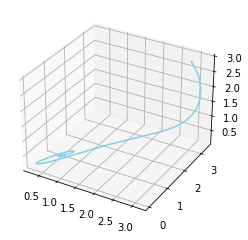

In [32]:
fig_1 = plt.figure()
ax = fig_1.add_subplot(111, projection = '3d')
ax.plot(laub_df_x1y1['x'], laub_df_x1y1['y'], laub_df_x1y1['z'], c='skyblue')

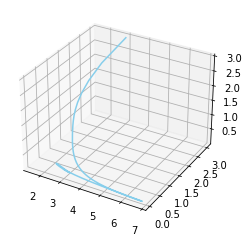

In [33]:
fig_1 = plt.figure()
ax = fig_1.add_subplot(111, projection = '3d')
ax.plot(laub_df_x1y1['w'], laub_df_x1y1['p'], laub_df_x1y1['q'], c='skyblue')

Plotting test data with different initial variables

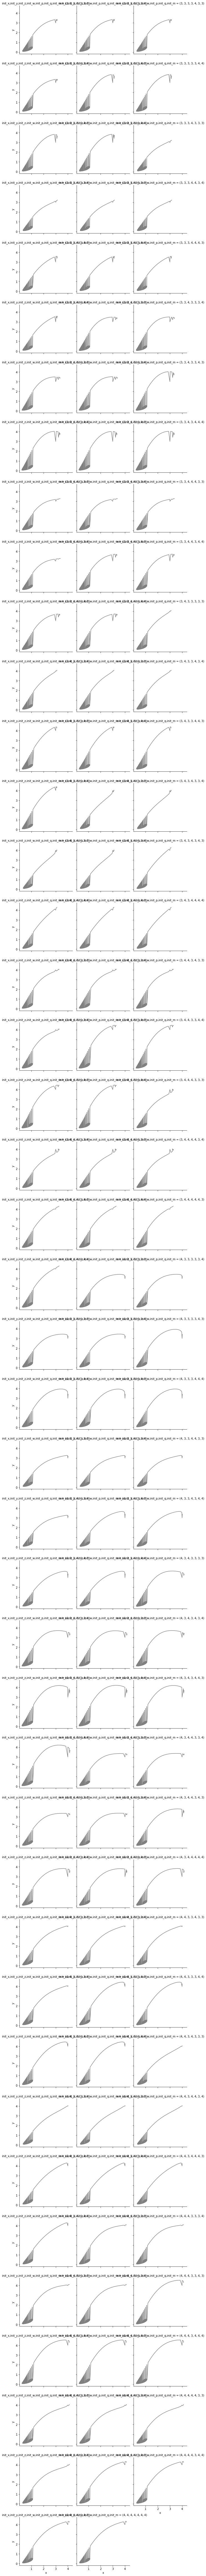

In [34]:
g = sns.FacetGrid(laub_df_preds, col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", col_wrap=3)
g.map(sns.lineplot, "x", "y", color=".5", ci=None)
g.add_legend()

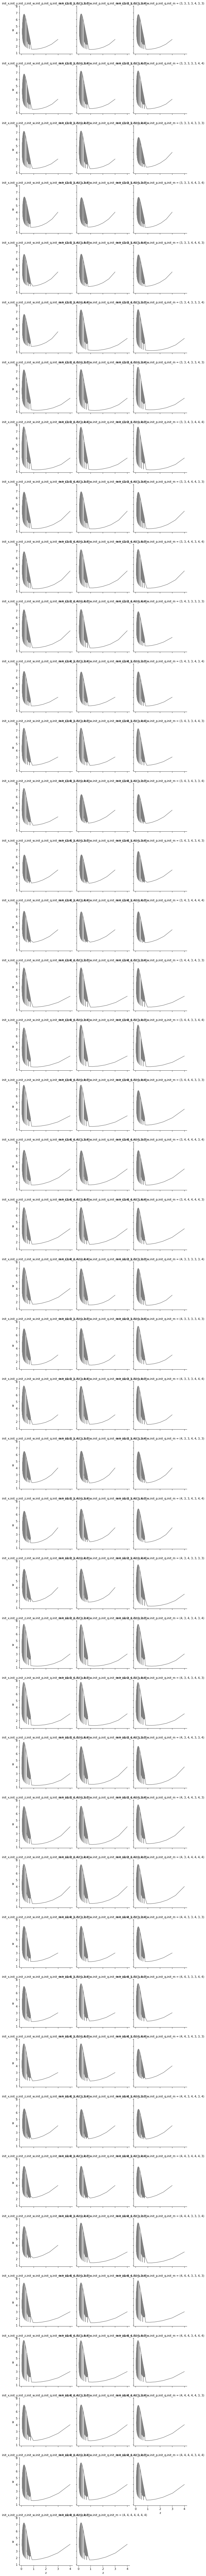

In [35]:
g = sns.FacetGrid(laub_df_preds, col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", col_wrap=3)
g.map(sns.lineplot, "z", "w", color=".5", ci=None)
g.add_legend()

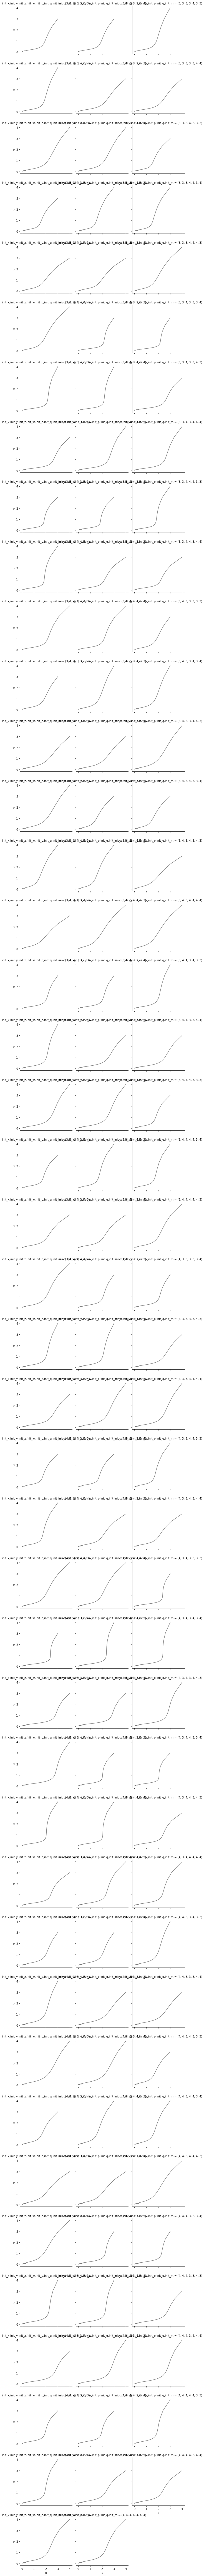

In [36]:
g = sns.FacetGrid(laub_df_preds, col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", col_wrap=3)
g.map(sns.lineplot, "p", "q", color=".5", ci=None)
g.add_legend()

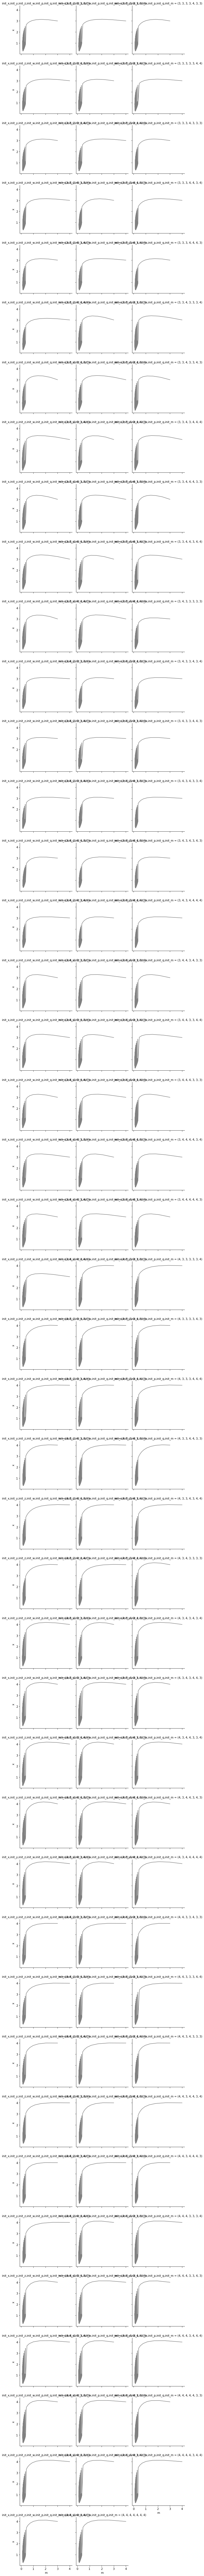

In [37]:
g = sns.FacetGrid(laub_df_preds, col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", col_wrap=3)
g.map(sns.lineplot, "m", "x", color=".5", ci=None)
g.add_legend()

Plotting test data with different times series

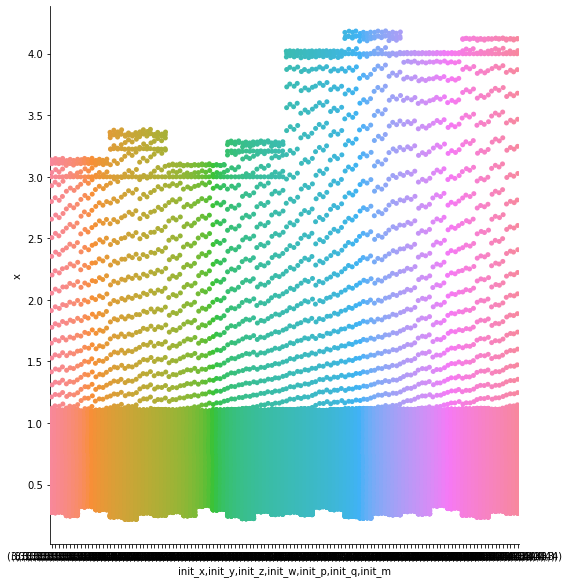

In [38]:
sns.catplot(height=8, data=laub_df_preds, x="init_x,init_y,init_z,init_w,init_p,init_q,init_m", y="x",)

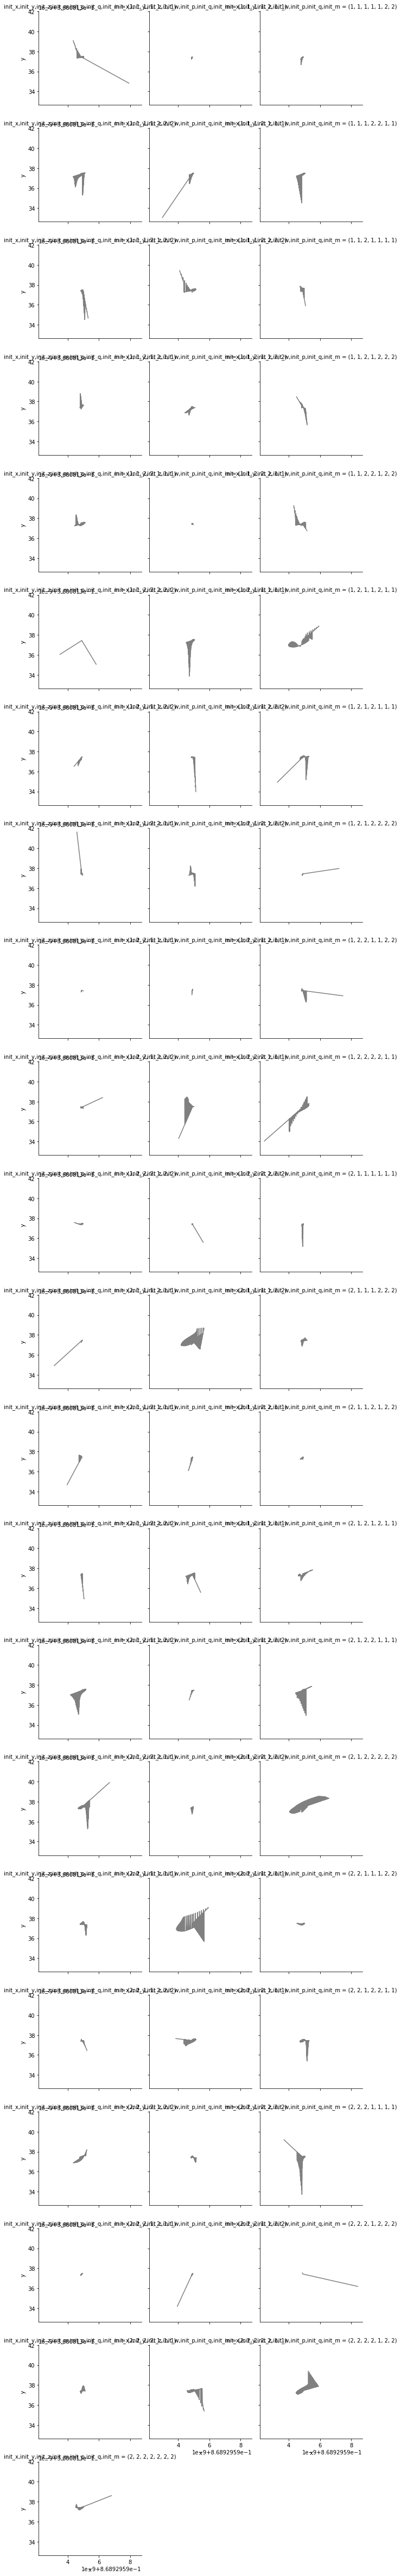

In [39]:
g = sns.FacetGrid(laub_df_preds_1, col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", col_wrap=3)
g.map(sns.lineplot, "x", "y", color=".5", ci=None)
g.add_legend()

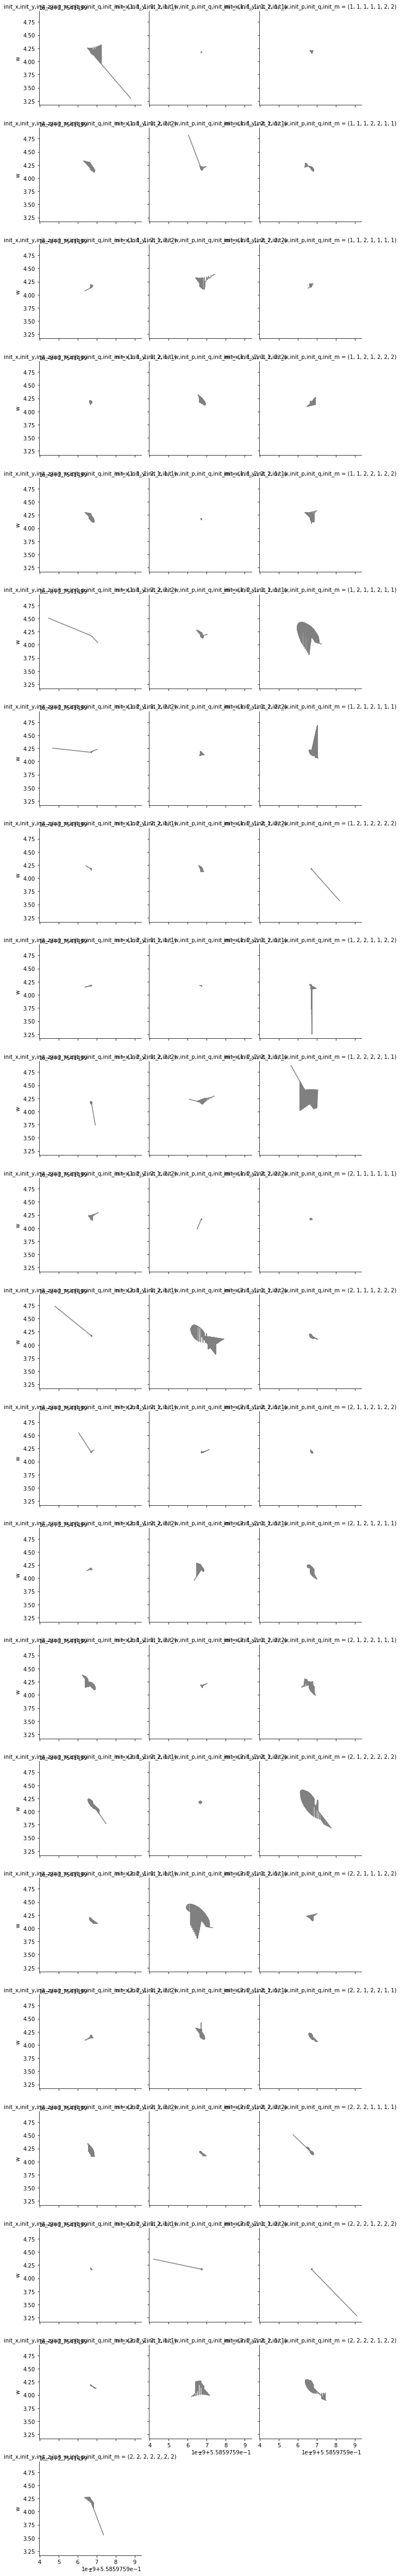

In [40]:
g = sns.FacetGrid(laub_df_preds_1, col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", col_wrap=3)
g.map(sns.lineplot, "z", "w", color=".5", ci=None)
g.add_legend()

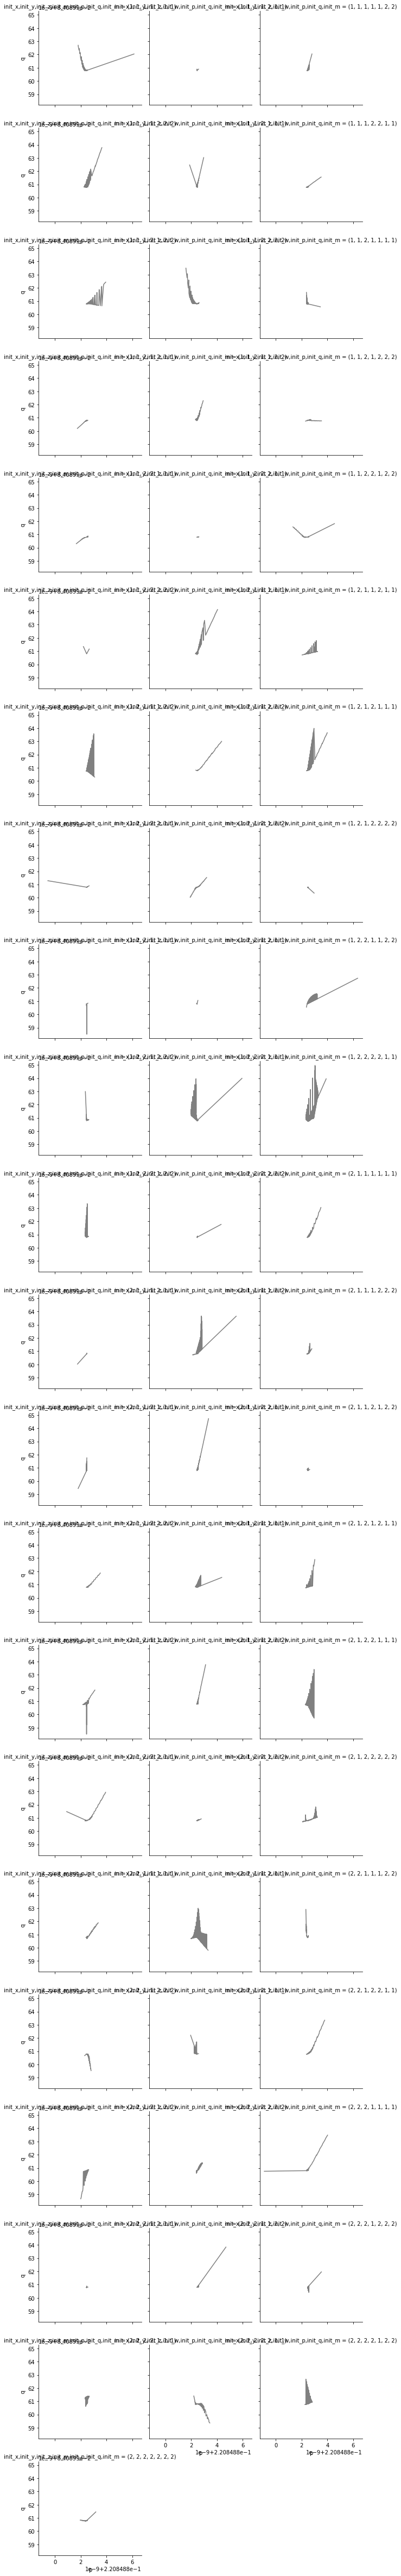

In [41]:
g = sns.FacetGrid(laub_df_preds_1, col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", col_wrap=3)
g.map(sns.lineplot, "p", "q", color=".5", ci=None)
g.add_legend()

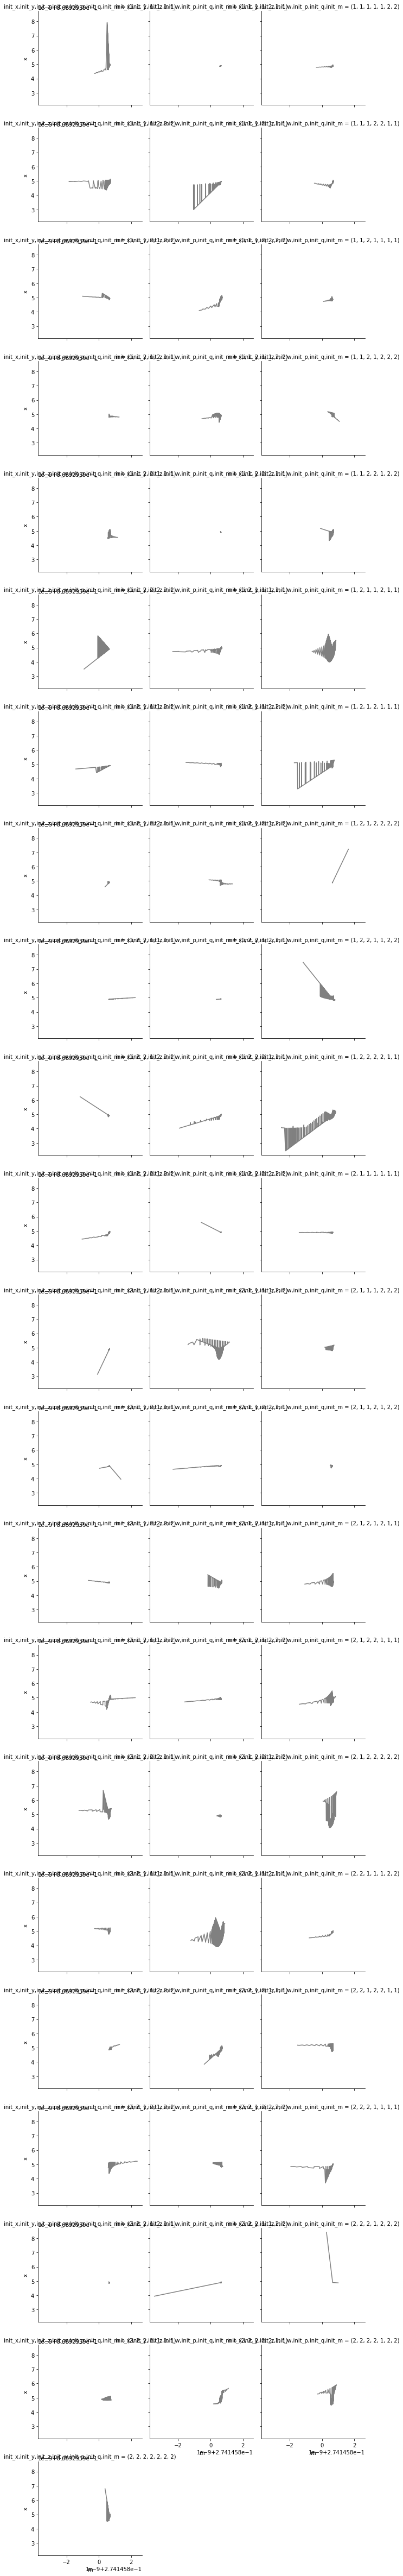

In [42]:
g = sns.FacetGrid(laub_df_preds_1, col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", col_wrap=3)
g.map(sns.lineplot, "m", "x", color=".5", ci=None)
g.add_legend()

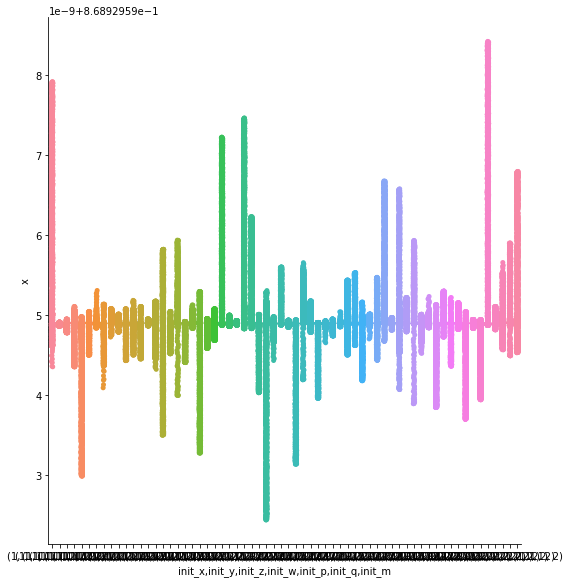

In [43]:
sns.catplot(height=8, data=laub_df_preds_1, x="init_x,init_y,init_z,init_w,init_p,init_q,init_m", y="x",)

### Predictions

Below we start first by visualising the predictions of simulations given by the neural network

In [ ]:
g = sns.FacetGrid(laub_df_preds, col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", col_wrap=3)
g.map(sns.lineplot, "x_preds", "y_preds", color=".5", ci=None)
g.add_legend()

In [ ]:
g = sns.FacetGrid(laub_df_preds, col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", col_wrap=3)
g.map(sns.lineplot, "z_preds", "w_preds", color=".5", ci=None)
g.add_legend()

In [ ]:
g = sns.FacetGrid(laub_df_preds, col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", col_wrap=3)
g.map(sns.lineplot, "p_preds", "q_preds", color=".5", ci=None)
g.add_legend()

In [ ]:
g = sns.FacetGrid(laub_df_preds, col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", col_wrap=3)
g.map(sns.lineplot, "m_preds", "x_preds", color=".5", ci=None)
g.add_legend()

In [ ]:
sns.catplot(height=8, data=laub_df_preds, x="init_x,init_y,init_z,init_w,init_p,init_q,init_m", y="x_preds",)

looking at predictions of test data with different time series

In [ ]:
g = sns.FacetGrid(laub_df_preds_1, col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", col_wrap=3)
g.map(sns.lineplot, "x_preds", "y_preds", color=".5", ci=None)
g.add_legend()

In [ ]:
g = sns.FacetGrid(laub_df_preds_1, col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", col_wrap=3)
g.map(sns.lineplot, "z_preds", "w_preds", color=".5", ci=None)
g.add_legend()

In [ ]:
g = sns.FacetGrid(laub_df_preds_1, col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", col_wrap=3)
g.map(sns.lineplot, "p_preds", "q_preds", color=".5", ci=None)
g.add_legend()

In [ ]:
g = sns.FacetGrid(laub_df_preds_1, col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", col_wrap=3)
g.map(sns.lineplot, "m_preds", "x_preds", color=".5", ci=None)
g.add_legend()

In [ ]:
sns.catplot(height=8, data=laub_df_preds_1, x="init_x,init_y,init_z,init_w,init_p,init_q,init_m", y="x_preds",)

### Combining the data

comparing predictions and simulations of test data with different initial times

In [ ]:
g = sns.FacetGrid(hue("x", laub_df_preds), col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", hue="x", col_wrap=3)
g.map(sns.lineplot, "xvals", "y", ci=None)
g.add_legend()

In [ ]:
g = sns.FacetGrid(hue("z", laub_df_preds), col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", hue="z", col_wrap=3)
g.map(sns.lineplot, "zvals", "w", ci=None)
g.add_legend()

In [ ]:
g = sns.FacetGrid(hue("x", laub_df_preds), col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", hue="x", col_wrap=3)
g.map(sns.lineplot, "time", "xvals", ci=None)
g.add_legend()

In [ ]:
g = sns.FacetGrid(hue("m", laub_df_preds), col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", hue="m", col_wrap=3)
g.map(sns.lineplot, "time", "mvals", ci=None)
g.add_legend()

Comparing predictions and simulations with test data with different time series

In [ ]:
g = sns.FacetGrid(hue("x", laub_df_preds_1), col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", hue="x", col_wrap=3)
g.map(sns.lineplot, "xvals", "y", ci=None)
g.add_legend()

In [ ]:
g = sns.FacetGrid(hue("z", laub_df_preds_1), col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", hue="z", col_wrap=3)
g.map(sns.lineplot, "zvals", "w", ci=None)
g.add_legend()

In [ ]:
g = sns.FacetGrid(hue("x", laub_df_preds_1), col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", hue="x", col_wrap=3)
g.map(sns.lineplot, "time", "xvals", ci=None)
g.add_legend()

In [ ]:
g = sns.FacetGrid(hue("m", laub_df_preds_1), col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", hue="m", col_wrap=3)
g.map(sns.lineplot, "time", "mvals", ci=None)
g.add_legend()